In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

plt.rcParams['font.family'] = font_name

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx',fillna=0,header=0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)
sr_one = df_seoul.loc['경기도']

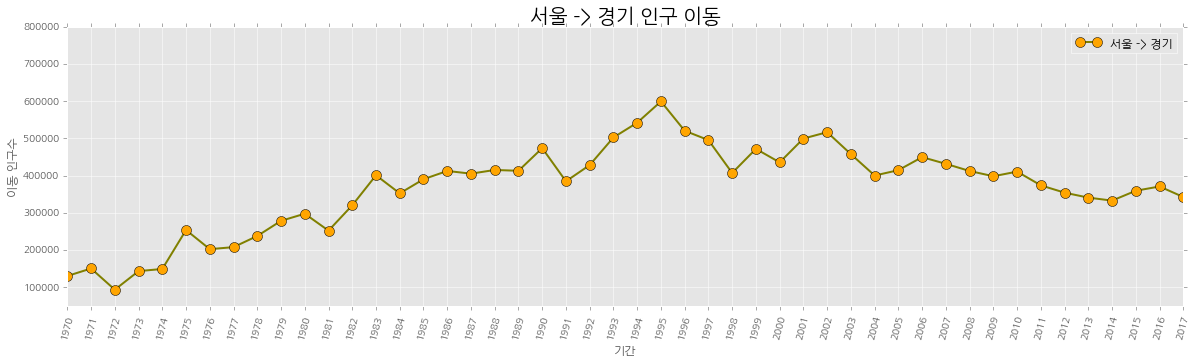

In [9]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(sr_one, marker='o',markerfacecolor='orange',markersize=10,color='olive',linewidth=2,label='서울 -> 경기')
ax.legend(loc='best')

ax.set_ylim(50000,800000)
ax.set_title('서울 -> 경기 인구 이동',size=20)

ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticklabels(sr_one.index,rotation=75)

ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)
plt.show()

In [10]:
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)

col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','부산광역시'], col_years]


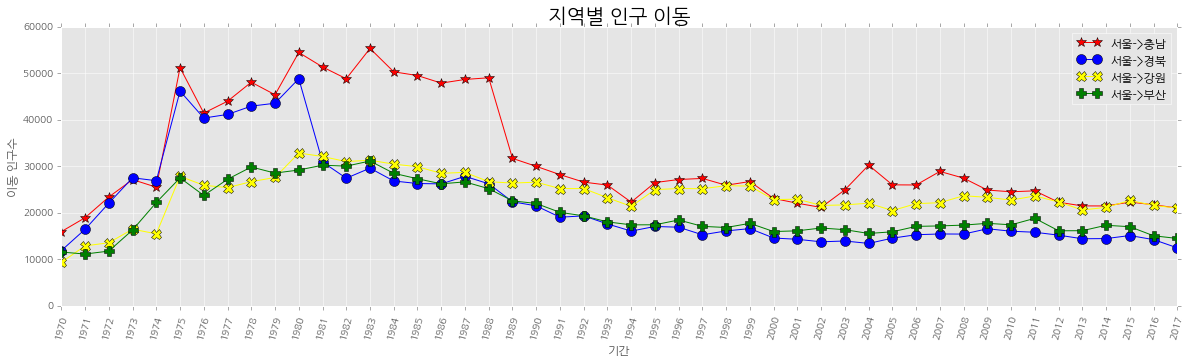

In [11]:
plt.style.use('ggplot')

fig=plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years,df_3.loc['충청남도',:],marker='*',markerfacecolor='red',markersize=10,color='red',linewidth=1,label='서울->충남')
ax.plot(col_years,df_3.loc['경상북도',:],marker='o',markerfacecolor='blue',markersize=10,color='blue',linewidth=1,label='서울->경북')
ax.plot(col_years,df_3.loc['강원도',:],marker='X',markerfacecolor='yellow',markersize=10,color='yellow',linewidth=1,label='서울->강원')
ax.plot(col_years,df_3.loc['부산광역시',:],marker='P',markerfacecolor='green',markersize=10,color='green',linewidth=1,label='서울->부산')

ax.legend(loc='best')

ax.set_title('지역별 인구 이동',size=20)

ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticklabels(col_years,rotation=75)
plt.show()

In [49]:
mask = (df['전출지별'] != '서울특별시') & (df['전입지별'] == '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전입지별'],axis=1)
df_seoul.rename({'전출지별':'전출지'},axis=1,inplace=True)
df_seoul.set_index('전출지',inplace=True)

col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','부산광역시'], col_years]
# df1 = df_seoul.loc[['부산광역시'],col_years]
# df_seoul

In [50]:
df_3

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전출지,,,,,,,,,,,,,,,,,,,,,
충청남도,67033,63565,40803,53320,61038,115149,81692,76119,83411,77054,...,26659,26072,23115,21674,20638,19680,19841,19144,18726,18582
경상북도,59129,63329,41532,61129,67374,124398,87716,79224,88334,79620,...,20524,19784,18395,17319,17694,16561,16796,16478,16087,15681
강원도,34563,38588,32497,40922,42649,74065,52651,52262,56527,47207,...,24484,24376,22798,21559,21324,19954,20174,20030,19877,19761
부산광역시,24263,30144,18260,24251,30284,59914,43416,42685,48142,39673,...,25249,24459,23116,23016,21437,19621,20616,19441,19236,19460


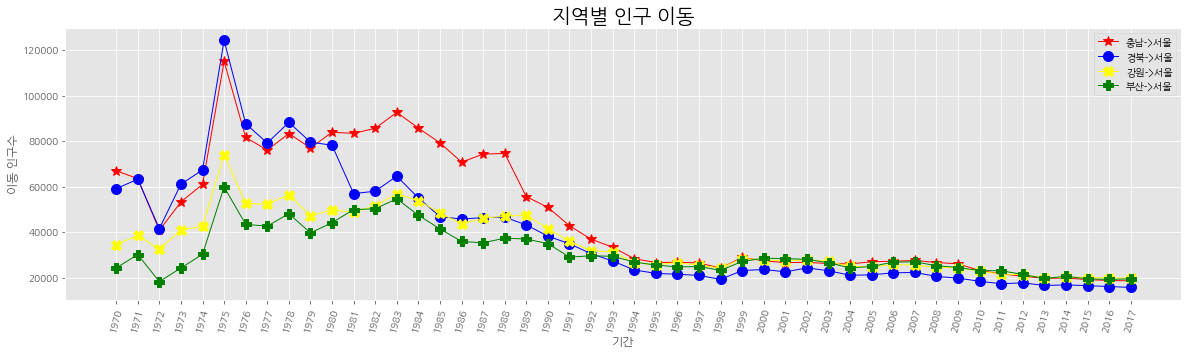

In [52]:
plt.style.use('ggplot')

fig=plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

ax.plot(col_years,df_3.loc['충청남도',:],marker='*',markerfacecolor='red',markersize=10,color='red',linewidth=1,label='충남->서울')
ax.plot(col_years,df_3.loc['경상북도',:],marker='o',markerfacecolor='blue',markersize=10,color='blue',linewidth=1,label='경북->서울')
ax.plot(col_years,df_3.loc['강원도',:],marker='X',markerfacecolor='yellow',markersize=10,color='yellow',linewidth=1,label='강원->서울')
ax.plot(col_years,df_3.loc['부산광역시',:],marker='P',markerfacecolor='green',markersize=10,color='green',linewidth=1,label='부산->서울')

ax.legend(loc='best')

ax.set_title('지역별 인구 이동',size=20)

ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동 인구수',size=12)

ax.set_xticklabels(col_years,rotation=75)
plt.show()

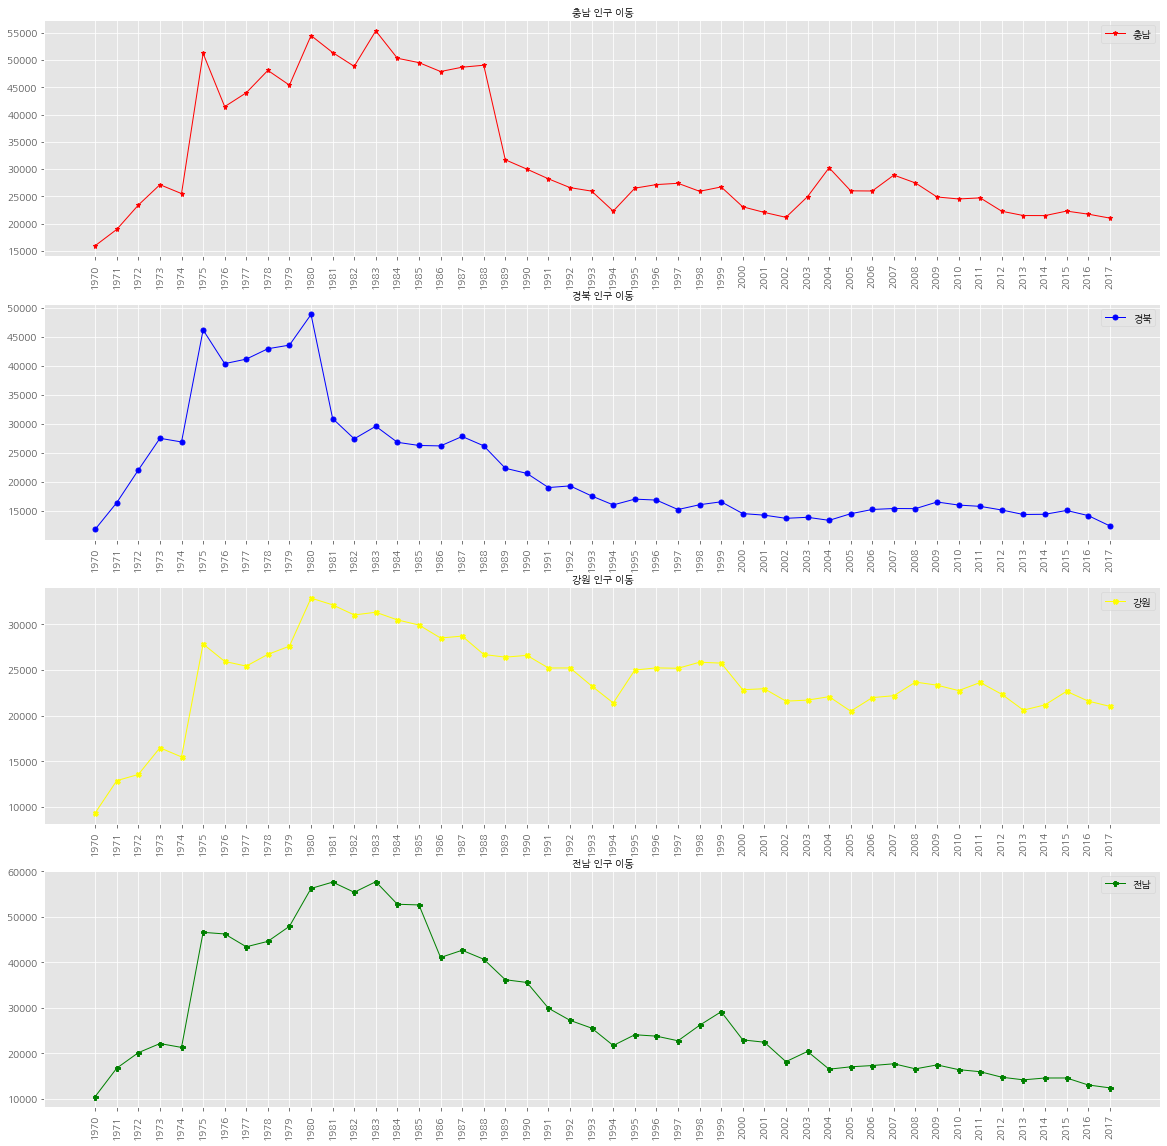

In [66]:
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]

plt.style.use('ggplot')

fig=plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.plot(col_years,df_4.loc['충청남도',:],marker='*',markerfacecolor='red',markersize=5,color='red',linewidth=1,label='충남')
ax2.plot(col_years,df_4.loc['경상북도',:],marker='o',markerfacecolor='blue',markersize=5,color='blue',linewidth=1,label='경북')
ax3.plot(col_years,df_4.loc['강원도',:],marker='X',markerfacecolor='yellow',markersize=5,color='yellow',linewidth=1,label='강원')
ax4.plot(col_years,df_4.loc['전라남도',:],marker='P',markerfacecolor='green',markersize=5,color='green',linewidth=1,label='전남')

ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

ax1.set_title('충남 인구 이동',size=10)
ax2.set_title('경북 인구 이동',size=10)
ax3.set_title('강원 인구 이동',size=10)
ax4.set_title('전남 인구 이동',size=10)

# plt.set_xlabel('기간',size=12)
# plt.set_ylabel('이동 인구수',size=12)

ax1.set_xticklabels(col_years,rotation=90)
ax2.set_xticklabels(col_years,rotation=90)
ax3.set_xticklabels(col_years,rotation=90)
ax4.set_xticklabels(col_years,rotation=90)
plt.show()

In [67]:
import matplotlib

colors={}

for name,hex in matplotlib.colors.cnames.items():
    colors[name] = hex
    
print(colors)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

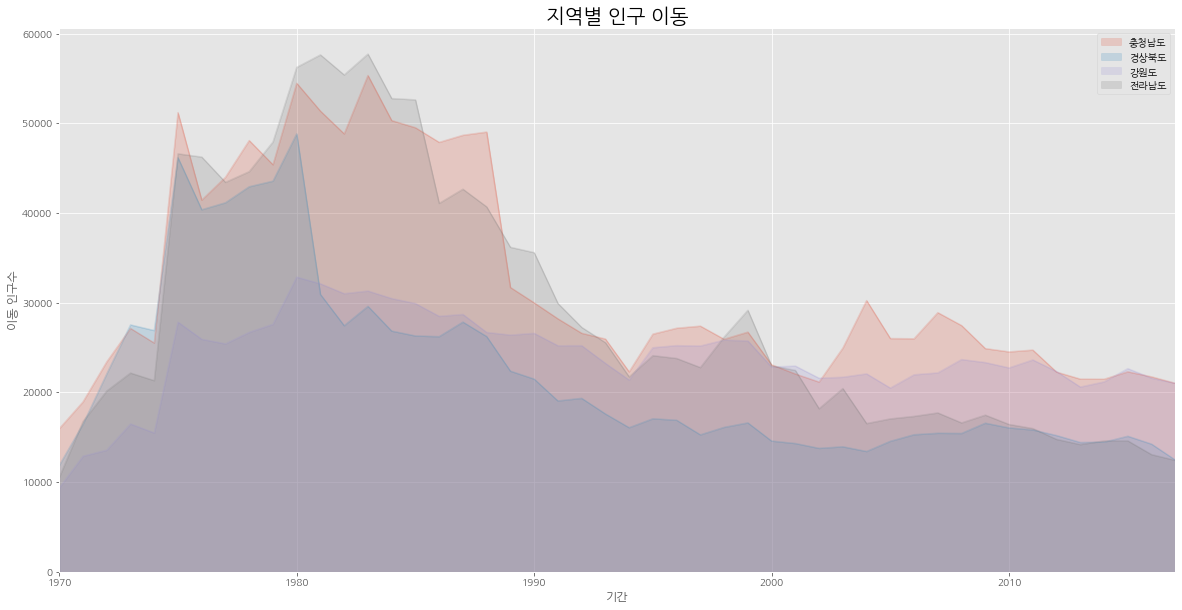

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['font.family'] = font_name

df = pd.read_excel('./data/시도별 전출입 인구수.xlsx',fillna=0,header=0)

df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'],axis=1)
df_seoul.rename({'전입지별':'전입지'},axis=1,inplace=True)
df_seoul.set_index('전입지',inplace=True)

col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'], col_years]
df_3 = df_3.transpose()

plt.style.use('ggplot')

df_3.index = df_3.index.map(int)

df_3.plot(kind='area',stacked=False,alpha=0.2,figsize=(20,10))



plt.title('지역별 인구 이동',size=20)

plt.xlabel('기간',size=12)
plt.ylabel('이동 인구수',size=12)

# plt.xticklabels(col_years,rotation=75)
plt.legend(loc='best',fontsize=10)
plt.show()

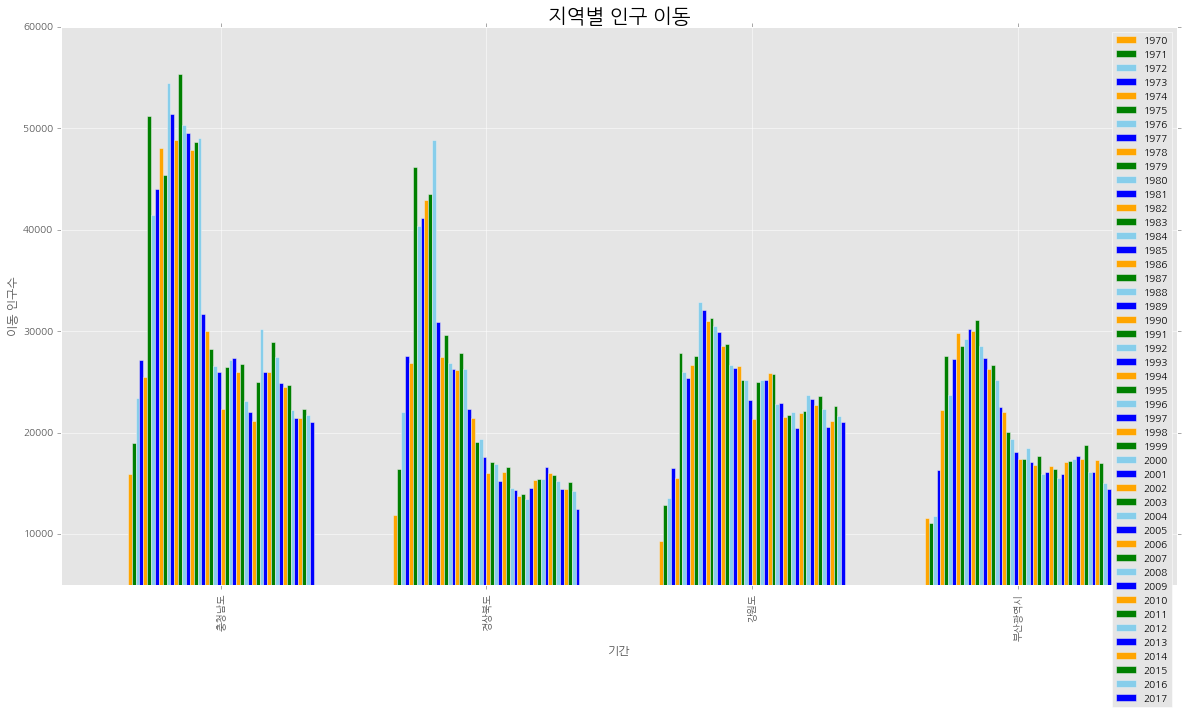

In [12]:

df_3.plot(kind='bar',figsize=(20,10),width=0.7,color=['orange','green','skyblue','blue'])

plt.title('지역별 인구 이동',size=20)

plt.xlabel('기간',size=12)
plt.ylabel('이동 인구수',size=12)

plt.ylim(5000,60000)
plt.legend(loc='best',fontsize=10)
plt.show()

In [98]:
df_4['합계'] = df_4.sum(axis=1)

In [99]:
df_4['합계']

전입지
충청남도    1529273.0
경상북도    1052175.0
강원도     1146275.0
전라남도    1381657.0
Name: 합계, dtype: float64

In [100]:
df_total = df_4[['합계']].sort_values(by='합계',ascending=True)
df_total

,합계
전입지,
경상북도,1052175.0
강원도,1146275.0
전라남도,1381657.0
충청남도,1529273.0


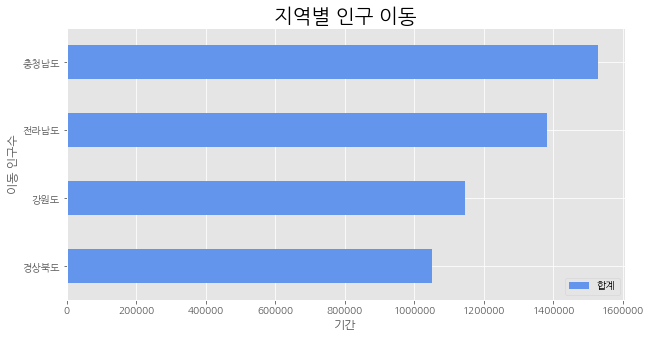

In [104]:
df_total.plot(kind='barh',color='cornflowerblue',width=0.5,figsize=(10,5))
plt.title('지역별 인구 이동',size=20)

plt.xlabel('기간',size=12)
plt.ylabel('이동 인구수',size=12)
plt.show()

In [150]:
a={'A':['a','a','a'],'B':['b','b','b'],'C':['c','c','c'],1:[2,3,4]}
df=pd.DataFrame(a)
df.set_index(['A','B','C'], inplace=True)
df

1
A B C   
a b c  2
    c  3
    c  4

In [167]:
df.iloc[2,0] = 35
df

1
A B C    
a b c  33
    c  35
    c  35

In [168]:
df = pd.read_excel('./data/남북한발전전력량.xlsx',convert_float=True)

df = df.loc[5:9]
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [169]:

df.drop('전력량 (억㎾h)',axis='columns',inplace=True)



In [170]:
df.set_index('발전 전력별',inplace=True)

In [171]:
df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
합계,277,263,247,221,231,230,213,193,170,186,...,236,255,235,237,211,215,221,216,190,239
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [172]:
df = df.T

In [173]:
df

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [185]:
df = df.rename(columns={'합계':'총발전량'})
df['총발전량 - 1년'] = df['총발전량'].shift(1)
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100
df

발전 전력별,총발전량,수력,화력,원자력,총발전량 - 1년,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-5.05415
1992,247,142,105,-,263,-6.08365
1993,221,133,88,-,247,-10.5263
1994,231,138,93,-,221,4.52489
1995,230,142,88,-,231,-0.4329
1996,213,125,88,-,230,-7.3913
1997,193,107,86,-,213,-9.38967
1998,170,102,68,-,193,-11.9171
1999,186,103,83,-,170,9.41176


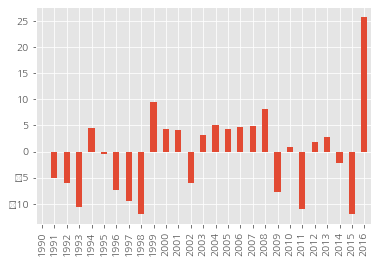

In [177]:
df['증감율'].plot(kind='bar')


In [13]:
ax1 = df[['화력','수력']].plot(kind='bar',figsize=(20,10),width=0.7,stacked=True)
ax2 = ax1.twinx()
ax2.plot(df.index,df['증감율'],ls='--',marker='*',markersize=30,color='red',label='전년대비 증감율(%)')

ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도',size=20)
ax2.set_ylabel('발전량')
ax2.set_ylabel('전년대비증감율')

plt.title('북한 전력 발전량',size=30)
ax1.legend(loc='upper left')
plt.show()

KeyError: "None of [Index(['화력', '수력'], dtype='object')] are in the [columns]"

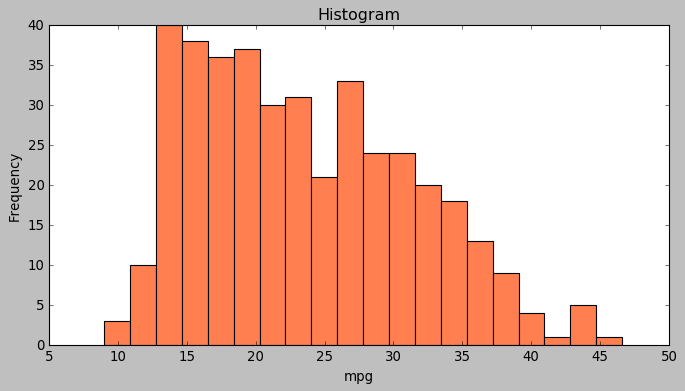

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

plt.rcParams['font.family'] = font_name

plt.style.use('classic')

df = pd.read_csv('./data/auto-mpg.csv',header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['mpg'].plot(kind='hist',bins=20,color='coral',figsize=(10,5))

plt.title('Histogram')
plt.xlabel('mpg')
plt.show()

In [15]:
df['mpg'].index

RangeIndex(start=0, stop=398, step=1)

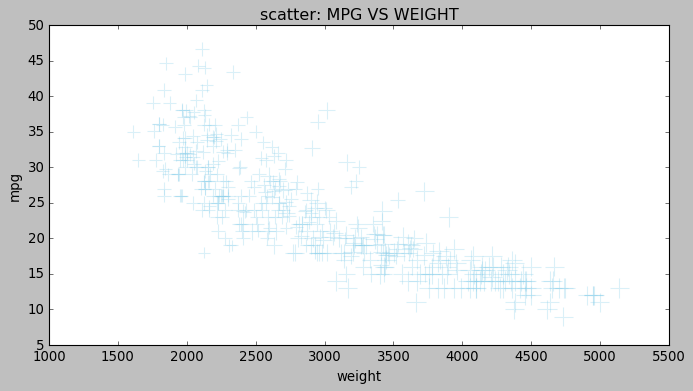

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

plt.rcParams['font.family'] = font_name

plt.style.use('classic')

df = pd.read_csv('./data/auto-mpg.csv',header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
cylinders_size=df.cylinders/df.cylinders.max() * 300
df.plot(kind='scatter',x='weight',y='mpg',c='skyblue',marker='+',s=cylinders_size,alpha=0.3,figsize=(10,5))
plt.title('scatter: MPG VS WEIGHT')
plt.show()

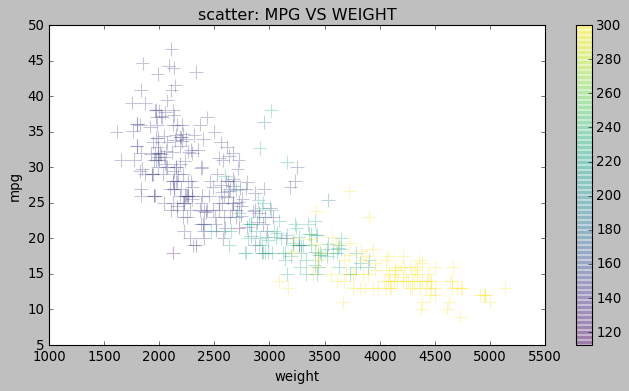

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

plt.rcParams['font.family'] = font_name

plt.style.use('classic')

df = pd.read_csv('./data/auto-mpg.csv',header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']
cylinders_size=df.cylinders/df.cylinders.max() * 300
df.plot(kind='scatter',x='weight',y='mpg',s=150,marker='+',c=cylinders_size,alpha=0.3,figsize=(10,5),cmap='viridis')

plt.title('scatter: MPG VS WEIGHT')
plt.show()

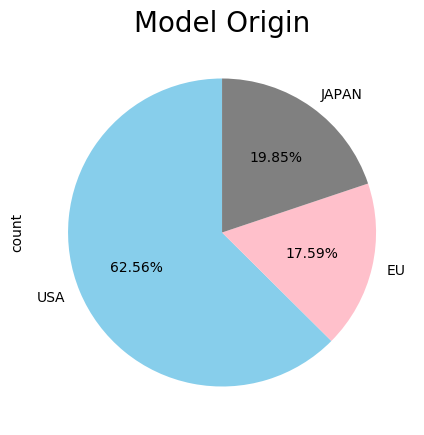

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

plt.rcParams['font.family'] = font_name

plt.style.use('default')

df = pd.read_csv('./data/auto-mpg.csv',header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','name']

df['count'] = 1
df_origin = df.groupby('origin').sum()

df_origin.index=['USA','EU','JAPAN']
df_origin['count'].plot(kind='pie',figsize=(7,5),autopct='%1.2f%%',startangle=90,colors=['skyblue','pink','gray'])


plt.title('Model Origin',size=20)




plt.show()

Text(0.5, 1.0, '수평박스플롯')

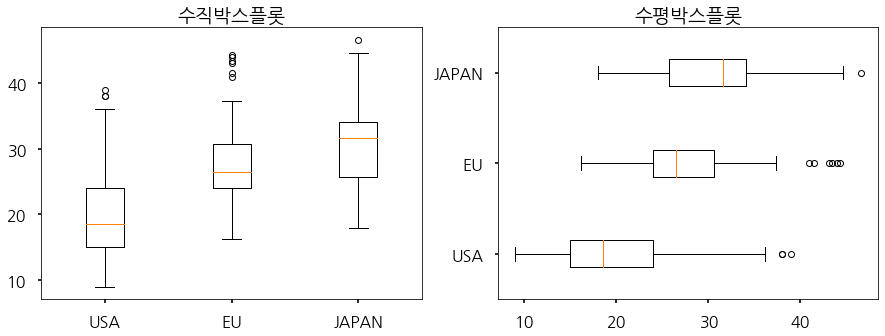

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager
from matplotlib import rc

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
# rc('font',family=font_name)

plt.rcParams['font.family'] = font_name

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x=[df[df['origin']==1]['mpg'],df[df['origin']==2]['mpg'],df[df['origin']==3]['mpg']],labels=['USA','EU','JAPAN'])
ax2.boxplot(x=[df[df['origin']==1]['mpg'],df[df['origin']==2]['mpg'],df[df['origin']==3]['mpg']],labels=['USA','EU','JAPAN'],vert=False)

ax1.set_title('수직박스플롯')
ax2.set_title('수평박스플롯')
                            

In [68]:
import seaborn as sns

titanic = sns.load_dataset('titanic')



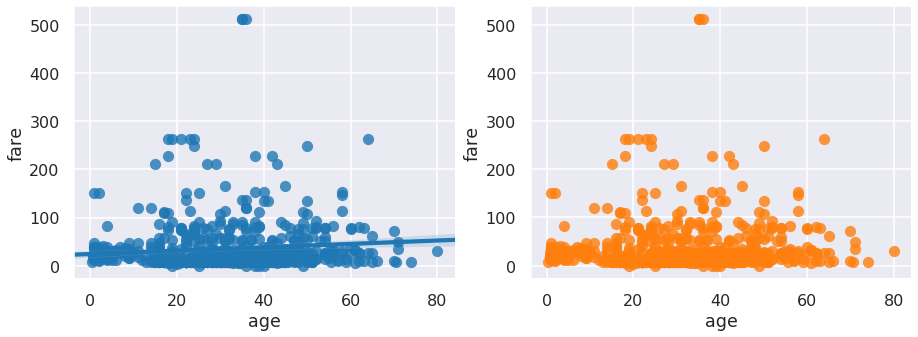

In [69]:
sns.set_style('darkgrid')

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age',y='fare',data=titanic,ax=ax1)

sns.regplot(x='age',y='fare',data=titanic,ax=ax2,fit_reg=False)
plt.show()

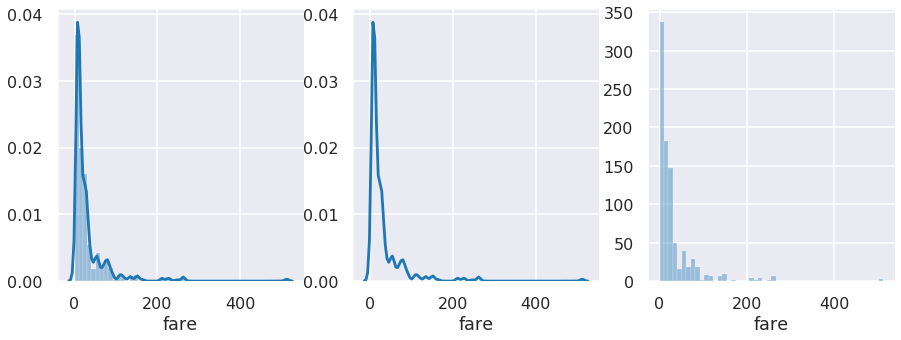

In [70]:
fig=plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.distplot(titanic['fare'],ax=ax1)

sns.distplot(titanic['fare'],hist=False,ax=ax2)
sns.distplot(titanic['fare'],kde=False,ax=ax3)

plt.show()

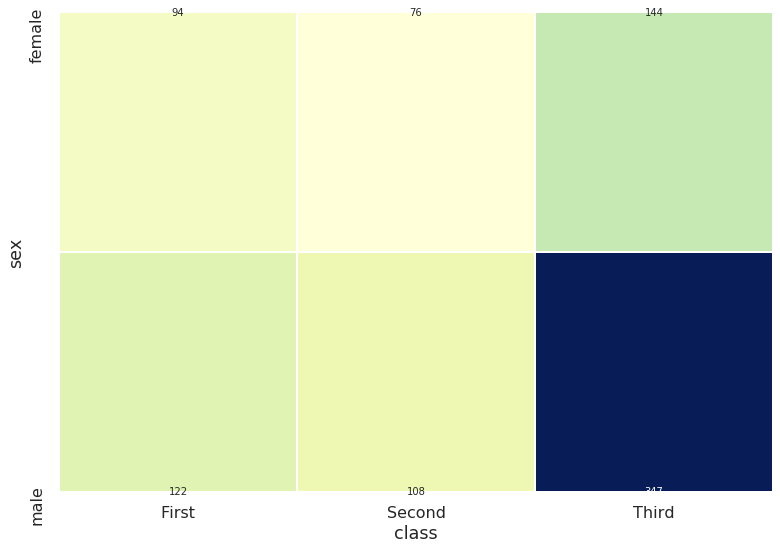

In [75]:
table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
# 성별을 기준으로 놓고 class에 있는 value값을 columns으로 줘서 만든다

sns.heatmap(table,annot=True,fmt='d',cmap='YlGnBu',linewidth=.5,cbar=False)
plt.show()

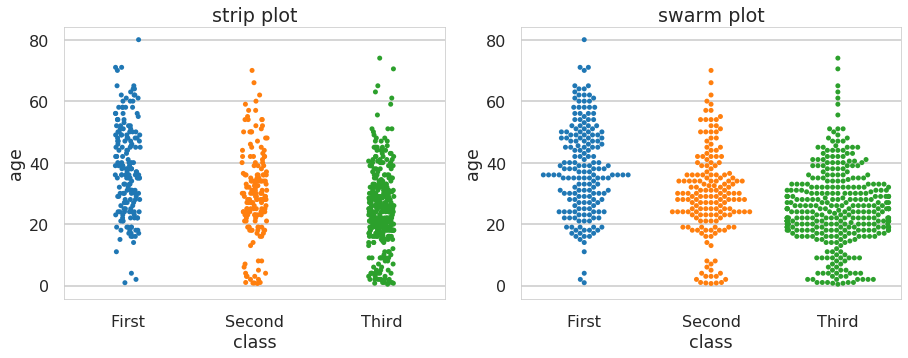

In [77]:
sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(x='class',y='age',data=titanic,ax=ax1)
sns.swarmplot(x='class',y='age',data=titanic,ax=ax2)

ax1.set_title('strip plot')
ax2.set_title('swarm plot')

plt.show()

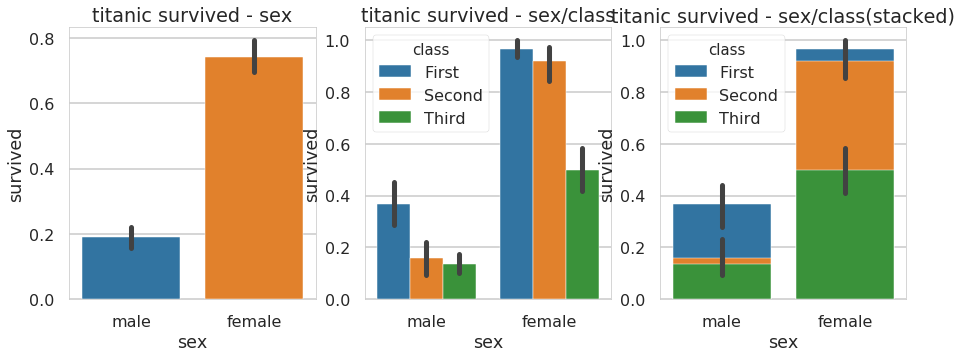

In [84]:
fig=plt.figure(figsize=(15,5))
ax1= fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax3= fig.add_subplot(1,3,3)

sns.barplot(x='sex',y='survived',data=titanic,ax=ax1)

sns.barplot(x='sex',y='survived',hue='class',data=titanic,ax=ax2)

sns.barplot(x='sex',y='survived',hue='class', dodge=False,data=titanic,ax=ax3)

ax1.set_title('titanic survived - sex')
ax2.set_title('titanic survived - sex/class')
ax3.set_title('titanic survived - sex/class(stacked)')

plt.show()

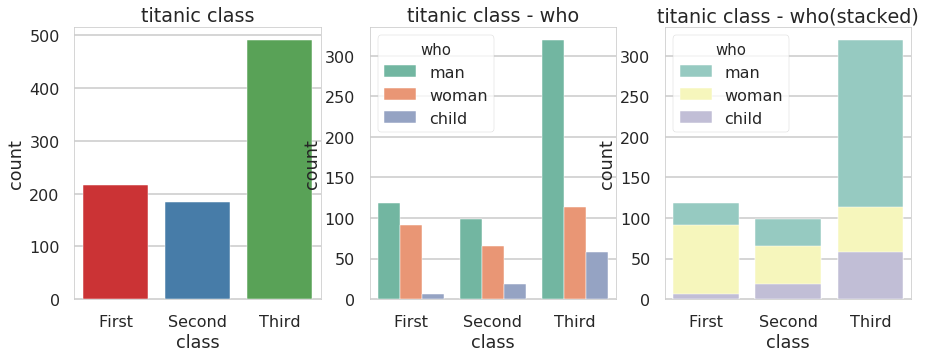

In [89]:
fig=plt.figure(figsize=(15,5))
ax1= fig.add_subplot(1,3,1)
ax2= fig.add_subplot(1,3,2)
ax3= fig.add_subplot(1,3,3)
sns.countplot(x='class',palette='Set1',data=titanic,ax=ax1)

sns.countplot(x='class',palette='Set2',hue='who',data=titanic,ax=ax2)

sns.countplot(x='class',palette='Set3',hue='who',dodge=False,data=titanic,ax=ax3)
              
ax1.set_title('titanic class')
ax2.set_title('titanic class - who')
ax3.set_title('titanic class - who(stacked)')

plt.show()

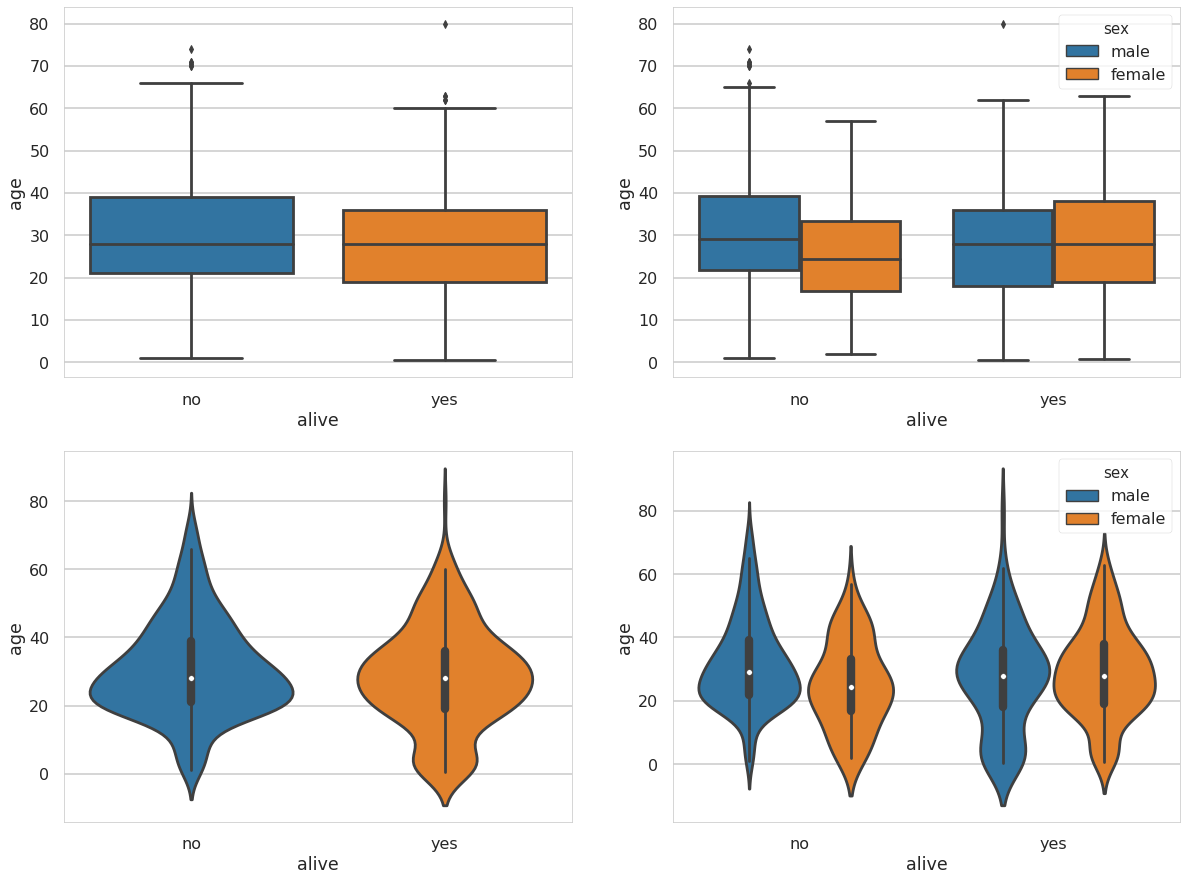

In [98]:
fig=plt.figure(figsize=(20,15))

ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,2)
ax3= fig.add_subplot(2,2,3)
ax4= fig.add_subplot(2,2,4)

sns.boxplot(x='alive',y='age',data=titanic,ax=ax1)

sns.boxplot(x='alive',y='age', hue='sex',data=titanic,ax=ax2)

sns.violinplot(x='alive',y='age',data=titanic,ax=ax3)

sns.violinplot(x='alive',y='age',hue='sex',data=titanic,ax=ax4)
              

plt.show()

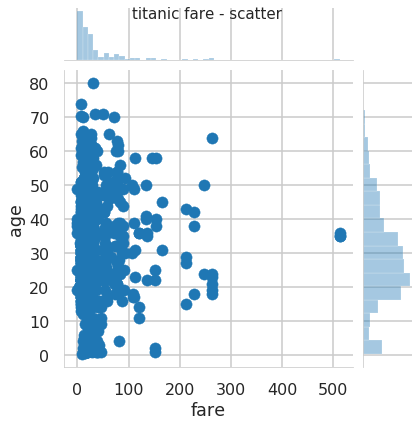

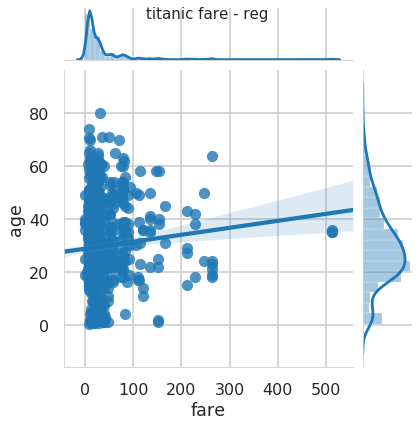

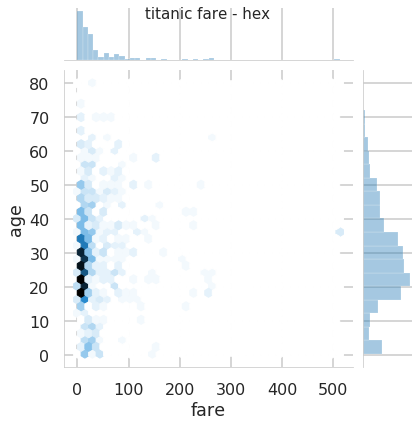

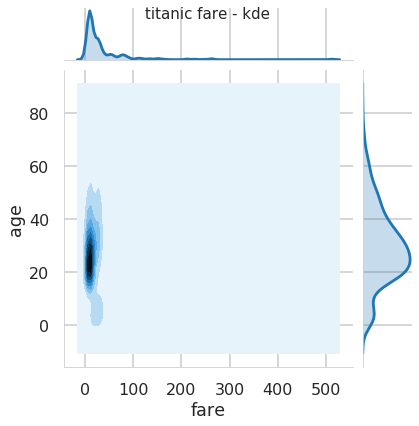

In [99]:
j1 = sns.jointplot(x='fare',y='age',data=titanic)

j2 = sns.jointplot(x='fare',y='age',kind='reg',data=titanic)

j3 = sns.jointplot(x='fare',y='age',kind='hex',data=titanic)

j4 = sns.jointplot(x='fare',y='age',kind='kde',data=titanic)

j1.fig.suptitle('titanic fare - scatter',size=15)
j2.fig.suptitle('titanic fare - reg',size=15)
j3.fig.suptitle('titanic fare - hex',size=15)
j4.fig.suptitle('titanic fare - kde',size=15)
plt.show()

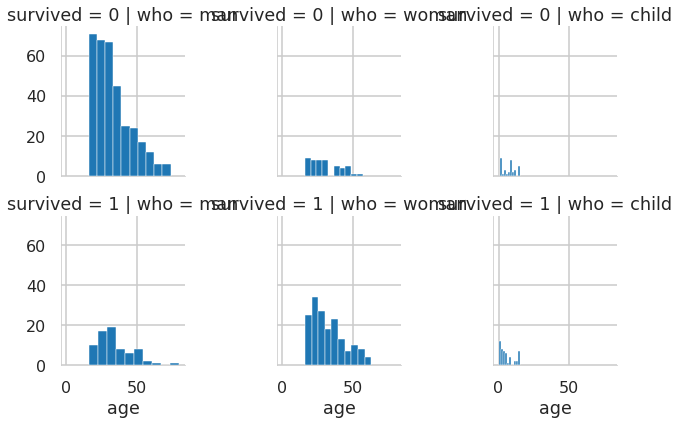

In [102]:
sns.set_style('whitegrid')

g = sns.FacetGrid(data=titanic,col='who',row='survived')

g = g.map(plt.hist,'age')

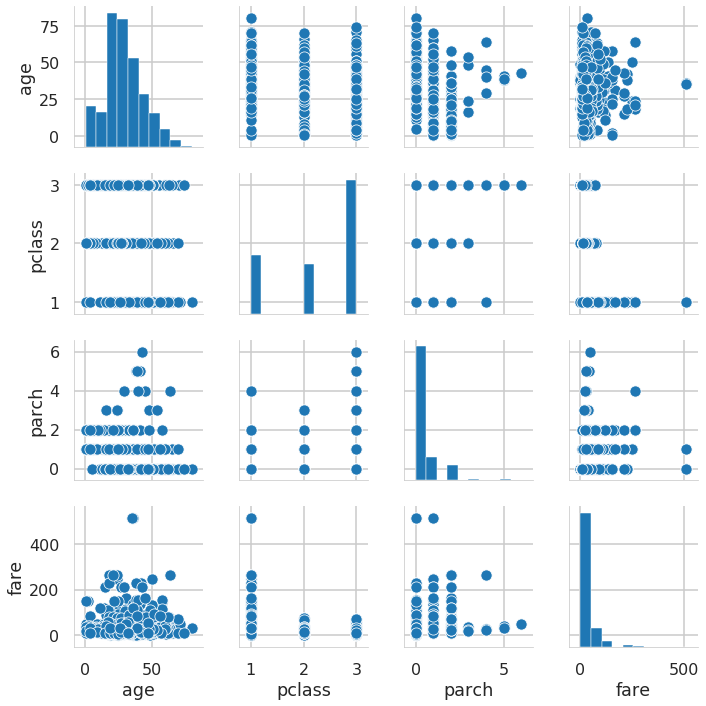

In [112]:
titanic_pair = titanic[['age','pclass','parch','fare']]

g = sns.pairplot(titanic_pair)

In [106]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [125]:
# 지도상에서 그리는 방법
import folium 
seoul_map = folium.Map(location=[37.55,126.98],zoom_start=12)
seoul_map.save('./seoul.html')

seoul_map = folium.Map(location=[37.55,126.98],tiles='Stamen Terrain',zoom_start=12)
seoul_map.save('./seoul1.html')

seoul_map = folium.Map(location=[37.55,126.98],tiles='Stamen Toner',zoom_start=15)
seoul_map.save('./seoul2.html')

In [146]:
import pandas as pd

df = pd.read_excel('./data/서울지역 대학교 위치.xlsx')
# df.set_columns = ['대학교','위도','경도']
seoul_map = folium.Map(location=[37.55,126.98],tiles = 'Stamen Terrain',zoom_start=10)

for name,lat,lng in zip(df.iloc[:,0],df.위도,df.경도):
    folium.Marker([lat,lng],popup=name).add_to(seoul_map)
    
seoul_map.save('./seoul_colleges.html')

In [145]:
df.iloc[:,1:3]

,위도,경도
0,37.592573,127.046737
1,37.548345,126.854797
2,37.585922,127.004328
3,37.499623,127.006065
4,37.567645,126.961610
5,37.540762,127.079343
6,37.300485,127.035833
7,37.596195,127.052544
8,33.847782,-117.977748
9,37.619496,127.059696


In [142]:
import pandas as pd

df = pd.read_excel('./data/서울지역 대학교 위치.xlsx')
# df.set_columns = ['대학교','위도','경도']
seoul_map = folium.Map(location=[37.55,126.98],tiles = 'Stamen Terrain',zoom_start=10)

for name,lat,lng in zip(df.iloc[:,0],df.위도,df.경도):
#     folium.Marker([lat,lng],popup=name).add_to(seoul_map)
    folium.CircleMarker([lat,lng],radius=10,color='brown',fill=True,fill_color='coral',fill_opacity=0.7,popup=name).add_to(seoul_map)
seoul_map.save('./seoul_colleges2.html')

In [152]:
import pandas as pd
import folium
import json

file_path = './data/경기도인구데이터.xlsx'
df = pd.read_excel(file_path,index_col='구분')
df.columns = df.columns.map(str)
geo_path = './data/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path,encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path,encoding='utf-8-sig'))
    
g_map = folium.Map(location=[37.5502,126.982],tiles='Stamen Terrain',zoom_start=9)

# year = '2007'
for year in range(2007,2018,1):
    year = str(year)
    folium.Choropleth(geo_data=geo_data,data=df[year],columns=[df.index,df[year]],fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.3,threshold_scale=[10000,100000,300000,500000,700000],key_on='feature.properties.name',).add_to(g_map)
    g_map.save('./gyonggi_population_'+year+'.html')

In [16]:
import pandas as pd
import folium
import json

file_path = './data/경기도인구데이터.xlsx'
df = pd.read_excel(file_path,index_col='구분')
df.columns = df.columns.map(str)
geo_path = './data/경기도행정구역경계.json'
try:
    geo_data = json.load(open(geo_path,encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path,encoding='utf-8-sig'))
    
g_map = folium.Map(location=[37.5502,126.982],tiles='Stamen Terrain',zoom_start=9)

# year = '2007'
for year in range(2007,2018,1):
    year = str(year)
    folium.Choropleth(geo_data=geo_data,data=df[year],columns=[df.index,df[year]],fill_color='YlOrRd',fill_opacity=0.7,line_opacity=0.3,threshold_scale=[10000,100000,300000,500000,700000],key_on='feature.properties.name',).add_to(g_map)
    g_map.save('./gyonggi_population_'+year+'.html')

In [17]:
df

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
구분,,,,,,,,,,,
수원시장안구,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828
수원시권선구,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653
수원시팔달구,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311
수원시영통구,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836
성남시수정구,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932
성남시중원구,263101,265137,259877,258093,254872,253883,256349,251982,250004,237909,230366
성남시분당구,434115,428858,460688,481027,488328,490735,495018,499087,501889,503830,500212
의정부시,421853,430849,431008,431801,430400,429147,430976,431112,433937,438457,441584
안양시만안구,265881,262820,262258,266261,263077,253492,250246,247315,247270,252353,254977


In [10]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import requests
import json

lists = []
col_lists=[]
# for j in range(16):
#     dict1 = {}
#     for i in range(16):
#         dict1[129.085923 + (0.000520*i)] = (35.233020 - (0.0004245*j))
#     lists.append(dict1)
    
# for dict1 in lists:    
#     for k,v in dict1.items():
for i in range(1,4):    
    open_api = 'https://dapi.kakao.com/v2/local/search/category.json?category_group_code=SC4&x=129.085937&y=35.231697&sort=distance&page=%s'%i
    api_key = 'f56b92905ade194d1254314f9e91d103'
    res = requests.get(open_api, headers={'Authorization' : 'KakaoAK ' + api_key } )
    dic1 = res.json()
    results = dic1['documents']
    meta = dic1['meta']['is_end']
    for result in results:
        name = result['place_name']    
        address = result['road_address_name']
        try:
            category = result['category_name'].split('>')[2]
            if category.strip() == '대학교':
                lists = [name,address,category]
                col_lists.append(lists)
        except:
            continue
            
print(col_lists)

[['부산대학교 언어교육원 TPC센터', '부산 금정구 부산대학로63번길 2', ' 대학교'], ['부산대학교 부산캠퍼스', '부산 금정구 부산대학로63번길 2', ' 대학교'], ['부산가톨릭대학교', '부산 금정구 오륜대로 57', ' 대학교']]


In [125]:
import pandas as pd
import folium
import json
from folium.features import DivIcon

file_path = './data/부산광역시_전체_세대_및_인구개황_20200108153737.csv'
df = pd.read_csv(file_path,encoding='euc-kr')
df = df.set_index('구·군별')
df = df.iloc[1:,[2]]
# df.columns = df.columns.map(str)
# geo_path = './data/TL_SCCO_SIG.json'
geo_path='./busan.json'
df_gu = pd.read_csv('./data/부산구좌표.txt',encoding='euc-kr')
df_gu
try:
    geo_data = json.load(open(geo_path,encoding='utf-8'))
except:
    geo_data = json.load(open(geo_path,encoding='utf-8-sig'))
    
g_map = folium.Map(location=[35.1831154,129.0710543],tiles='Stamen Terrain',zoom_start=11)


folium.Choropleth(geo_data=geo_data,data=df['인구수'],columns=[df.index,df['인구수']],fill_color='YlOrRd',fill_opacity=0.5,line_opacity=0.3,key_on='feature.properties.SIG_KOR_NM',threshold_scale=[40000,150000,250000,350000,450000]).add_to(g_map)
# folium.Marker(location = [35.1831154,129.0710543],popup=tel[0]).add_to(g_map)
for row in range(len(df_gu)):
    folium.map.Marker([df_gu.iloc[row,0], df_gu.iloc[row,1]-0.01],icon=DivIcon(icon_size=(150,36),icon_anchor=(0,0),html='<div style="font-size: 10pt;color:#000000">%s<br/>%s</div>' %( df_gu.iloc[row,2],tel[ df_gu.iloc[row,2]   ]),)).add_to(g_map)
g_map.save('./busan_population2.html')

In [121]:
df

,인구수
구·군별,
해운대구,411176
부산진구,361927
사하구,327365
북구,293714
남구,282281
동래구,271821
금정구,244786
사상구,225046
연제구,210565


In [26]:
%matplotlib inline
import pandas as pd
import cx_Oracle as oci
import matplotlib.pyplot as plt

conn = oci.connect('admin/1234@192.168.99.100:32764/xe',encoding='utf-8')
cursor = conn.cursor()

sql = 'SELECT * FROM TAXI'
cursor.execute(sql)
data = cursor.fetchall()

df = pd.DataFrame(data)

df.columns = ['No','기준년월일','요일','시간대','발신지_시도','발신지_시군구','발신지_읍면동','통화건수']



In [27]:
tel = df.groupby('발신지_시군구').sum()['통화건수']
tel

발신지_시군구
강서구      423338
금정구      749021
기장군     1543863
남구      1156736
동구       377180
동래구     1405954
부산진구    2012629
북구      1216579
사상구     1146595
사하구     1349549
서구       653664
수영구      704654
연제구      623221
영도구      599168
중구       210301
해운대구    2311793
Name: 통화건수, dtype: int64

In [33]:
tel['강서구']

423338

In [55]:
import pandas as pd
df_gu = pd.read_csv('./data/부산구좌표.txt',encoding='euc-kr')
df_gu
    

,X,Y,구군
0,35.166335,129.042861,부산진구
1,35.148433,128.894449,강서구
2,35.125412,129.093819,남구
3,35.076967,129.063924,영도구
4,35.082549,129.016884,서구
5,35.128808,129.045598,동구
6,35.228322,129.024416,북구
7,35.294067,129.201016,기장군
8,35.185384,129.154715,해운대구
9,35.209920,129.078622,동래구


In [59]:

print(df_gu.iloc[1,2])

강서구


In [124]:
import json
geo_data = json.load(open('./busan.json',encoding='utf-8'))
df_center = pd.DataFrame()
for n in range(len(geo_data['features'])):
    name = geo_data['features'][n]['properties']['SIG_KOR_NM']
    df_center[name] = pd.DataFrame(geo_data['features'][n]['geometry']['coordinates'][0]).mean()
df_center['중구']

0    129.034627
1     35.105130
Name: 중구, dtype: float64

In [123]:
pd.DataFrame(geo_data['features'][0]['geometry']['coordinates'][0]).mean()

0    129.034627
1     35.105130
dtype: float64

In [113]:
import folium



text = 'Test'
circle_lat = 60
circle_lon = 10

m = folium.Map([60, 10], tiles='Mapbox Bright', zoom_start=5)
folium.Circle([circle_lat, circle_lon], 150000, fill=True).add_child(folium.Popup('My name is Circle')).add_to(m)
